## Bootstrapping an OIS curve

In this notebook we will try to bootstrap an OIS curve to satisfy the minimal requirement of ISDA-SIMM. By exactly matching
the minimal requirement we do not introduce any added complexity that wouldn't increase the granularity of the risk model
anyways.

ISDA-SIMM has two requirements.
1. We need par Sensitivities  - i.e. the quotes used for bootstrapping the curve need to be shifted and the curve
re-bootstrapped to calculate sensitivities.

2. The minimal tenors for which we need sensitivities are 2W, 1M, 3M, 6M, 1Y, 3Y, 5Y, 10Y, 15Y, 20Y and 30Y

Therefore we will bootstrap a curve using 11 swaps on exactly these vertexes.

Our dummy quotes are the following:

In [1]:
import QuantLib as ql

today = ql.Date(10, ql.May, 2019)
ql.Settings.instance().evaluationDate = today

swap_quotes = {(2, ql.Weeks): ql.SimpleQuote(-0.36503/100),
               (1, ql.Months): ql.SimpleQuote(-0.3650/100),
               (3, ql.Months): ql.SimpleQuote(-0.36521/100),
               (6, ql.Months): ql.SimpleQuote(-0.36754/100),
               (1, ql.Years): ql.SimpleQuote(-0.37488/100),
               (3, ql.Years): ql.SimpleQuote(-0.31511/100),
               (10, ql.Years): ql.SimpleQuote(0.28879/100),
               (15, ql.Years): ql.SimpleQuote(0.62908/100),
               (20, ql.Years): ql.SimpleQuote(0.82255/100),
               (30, ql.Years): ql.SimpleQuote(0.92238/100)}

Next we need to create the swaps that are using these quotes. We will collect them in a helper array.

In [3]:
helpers = []

for tenor, quote in swap_quotes.items():
    helpers.append(ql.OISRateHelper(2, ql.Period(*tenor), ql.QuoteHandle(quote), ql.Eonia()))

In [6]:
eonia_curve = ql.PiecewiseLogCubicDiscount(0, ql.TARGET(), helpers, ql.Actual360())

eonia_curve.enableExtrapolation()

In [11]:
end= today+ql.Period(30, ql.Years)
dates= [ql.Date(serial) for serial in range(today.serialNumber(), end.serialNumber()+1)]
rates = [eonia_curve.forwardRate(d, ql.TARGET().advance(d,1,ql.Days), ql.Actual360(), ql.Simple).rate() for d in dates]

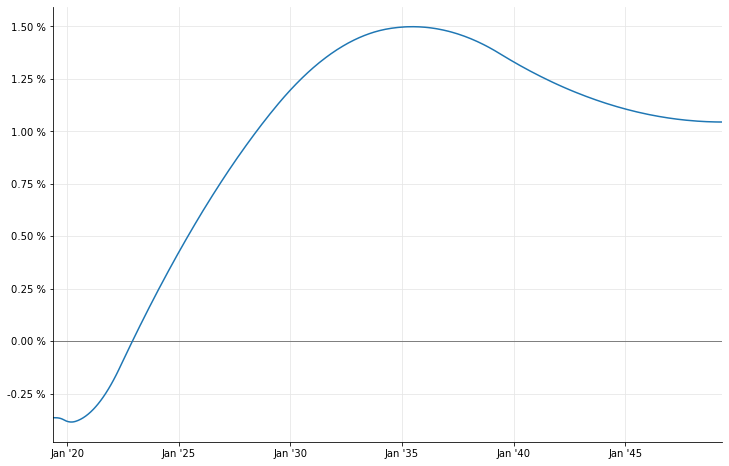

In [12]:
from quantlibpythoncookbook_extras import utils

_, ax = utils.plot()
utils.highlight_x_axis(ax)
utils.plot_curve(ax, dates, [(rates, '-')], format_rates=True)